# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Checking-regression" data-toc-modified-id="Checking-regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Checking regression</a></div><div class="lev2 toc-item"><a href="#Checking-functions" data-toc-modified-id="Checking-functions-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Checking functions</a></div><div class="lev3 toc-item"><a href="#Generate-boxes" data-toc-modified-id="Generate-boxes-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Generate boxes</a></div><div class="lev3 toc-item"><a href="#Generate-rotated-boxes" data-toc-modified-id="Generate-rotated-boxes-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Generate rotated boxes</a></div><div class="lev3 toc-item"><a href="#Generate-test-dataset" data-toc-modified-id="Generate-test-dataset-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Generate test dataset</a></div><div class="lev3 toc-item"><a href="#Conv-net-definitions" data-toc-modified-id="Conv-net-definitions-114"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Conv net definitions</a></div><div class="lev3 toc-item"><a href="#Generate-Default-boxes" data-toc-modified-id="Generate-Default-boxes-115"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Generate Default boxes</a></div><div class="lev3 toc-item"><a href="#Center-to-coords" data-toc-modified-id="Center-to-coords-116"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Center to coords</a></div><div class="lev3 toc-item"><a href="#Get-prediction-boxes" data-toc-modified-id="Get-prediction-boxes-117"><span class="toc-item-num">1.1.7&nbsp;&nbsp;</span>Get prediction boxes</a></div><div class="lev3 toc-item"><a href="#Draw-all-boxes" data-toc-modified-id="Draw-all-boxes-118"><span class="toc-item-num">1.1.8&nbsp;&nbsp;</span>Draw all boxes</a></div><div class="lev3 toc-item"><a href="#Normalize-shifts" data-toc-modified-id="Normalize-shifts-119"><span class="toc-item-num">1.1.9&nbsp;&nbsp;</span>Normalize shifts</a></div><div class="lev3 toc-item"><a href="#Regression-loss" data-toc-modified-id="Regression-loss-1110"><span class="toc-item-num">1.1.10&nbsp;&nbsp;</span>Regression loss</a></div><div class="lev3 toc-item"><a href="#Get-aspect-ratio" data-toc-modified-id="Get-aspect-ratio-1111"><span class="toc-item-num">1.1.11&nbsp;&nbsp;</span>Get aspect ratio</a></div><div class="lev3 toc-item"><a href="#Eveyrthing-connected" data-toc-modified-id="Eveyrthing-connected-1112"><span class="toc-item-num">1.1.12&nbsp;&nbsp;</span>Eveyrthing connected</a></div><div class="lev2 toc-item"><a href="#Experiments" data-toc-modified-id="Experiments-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Experiments</a></div>

# Checking regression 

The strategy will be to check regression in x and y and see how that works out when you combine it. Clearly something must be amiss. So the list of things to do is the following - 


1) check regression in x 

2) check regression in y 

3) check regression when you combine both

4) For all of this you need to check each function to make sure that it is doing what its supposed to do




## Checking functions 

### Generate boxes

First attempt chose a static box to see what is going on,  you will replicate the code for random boxes

In [1]:
import chainer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches, transforms 
import random 
from chainer.functions import log, hstack, huber_loss
from chainer import cuda 
import cupy 
# %matplotlib notebook
def get_single_image(pos_r, pos_c, height, width, angle  ): 
    
    image = np.zeros((1,3,128,128), dtype=np.float32)

    gts = []

    for i in range(1):
        # Choose random coordinate, this can also be run in a loop
        width = width
        height =height
        pos_r =pos_r
        pos_c =pos_c
        image[0,:,pos_r-int(height/2):pos_r+int(height/2),pos_c-int(width/2):pos_c+int(width/2)]=1
        #print(pos_r, pos_c)

        cx = pos_c #+ width/2.0
        cy = pos_r #+ #height/2.0

        box = [cx, cy, width, height,angle, 1, 0]

        gts.append(box)

    # Create ground truth object
    gts2 = chainer.Variable(cuda.to_gpu(np.array(gts, dtype=np.float32))) 
    
    return gts2,image 


gt, img  = get_single_image(50,50, 50,20, 0.0)
# for i in range(1):
    # Initialize the image
    
    # Visualize the entire thing
#     img_np = np.array(img)
#     plt.imshow(img[0,0,:,:])
#     plt.show()

In [2]:
print('ground truth box coordinates: ' ,gt,'gt shape :' ,gt.shape)
print('-----------------------------------------------')
print('Image shape', img.shape)


ground truth box coordinates:  variable([[ 50.  50.  20.  50.   0.   1.   0.]]) gt shape : (1, 7)
-----------------------------------------------
Image shape (1, 3, 128, 128)


In [3]:
img

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]]], dtype=float32)

### Generate rotated boxes

In [4]:
# checking how to generate rotated rectangles 
from PIL import Image
from PIL import ImageDraw
import math

def rotate_point(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)

    return qx, qy

angle= np.deg2rad(96)
img_size = img.shape[2]
centerx= 60
centery = 60 
width =30 
height= 50 



def rotated_generated_image(centerx, centery, width, height, angle, plot_image=False): 
    """
     Input- 
     
     img_size : (2,2) array -size of the input image to draw on 
     
     Output- 
     box      : 1*7 numpy array [centerx, centery, width, height, angle,1,0]
     
    """
  
    img_size= 128
    
    angle = angle
    points =np.array([[centerx-(width/2),centery-(height/2)],
            [centerx-(width/2),centery+(height/2)], 
            [centerx+(width/2),centery+(height/2)], 
             [centerx+(width/2),centery-(height/2)]])
    center = [centerx, centery]
    all_rotated_points = [ rotate_point(center,points[x,:], angle) for x in range(0,4)]    

    img = Image.new('RGB', (img_size, img_size), (0, 0, 0))
    draw = ImageDraw.Draw(img, 'RGBA')
    draw.polygon(all_rotated_points, (255, 0, 0))
    img_numpy = np.array(img, dtype=np.float32)
    box = chainer.Variable(cuda.to_gpu(np.array([centerx, centery, width, height, angle, 1, 0], dtype=np.float32)))       
    box =chainer.functions.reshape(box,(1,7))
  
    
    if plot_image==True: 
        plt.figure()
        plt.imshow(img_numpy[:,:,0])
        plt.show()
    
    for i in range(3): 
        single_channel = img_numpy[:,:,i]
    
        if i==0:     
            tr_image = np.reshape(single_channel,[1,1,single_channel.shape[0], single_channel.shape[1]], order='C')
        else: 
            tr_image =np.hstack((tr_image,  np.reshape(single_channel,[1,1,single_channel.shape[0], single_channel.shape[1]], order='C')))
        
    
    return box, tr_image


rot_gt,rot_img= rotated_generated_image(centerx, centery, width, height, angle,plot_image=False )    
print('ground truth box coordinates: ' ,rot_gt,'gt shape :' ,rot_gt.shape)
print('-----------------------------------------------')
print('Image shape', rot_img.shape)



ground truth box coordinates:  variable([[ 60.          60.          30.          50.           1.67551613
             1.           0.        ]]) gt shape : (1, 7)
-----------------------------------------------
Image shape (1, 3, 128, 128)


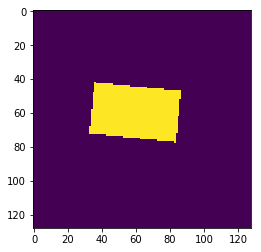

In [5]:

        
plt.figure()
plt.imshow(rot_img[0,0,:,:])
plt.show()


### Generate test dataset

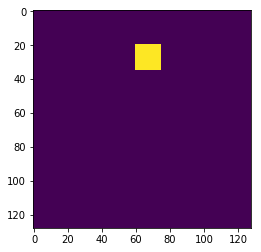

In [6]:
def generate_test_set():
    
    image_sizes = [10,15,20,25,30,35,40,45,50,55,60]
    locx =[20,20,30,30,40,40,50, 60,60,60,60]
    locy = [60,60,30,30,40,60,50, 45,45,50,50]
    test_gts = []
    imgs = []
    
    for i in range(len(locx)): 

        image = np.zeros((1,3,128,128), dtype=np.float32)
        # Choose random coordinate, this can also be run in a loop
        width = image_sizes[i]
        height =image_sizes[i]
        pos_r =locx[i]
        pos_c =locy[i]
        image[0,:,pos_r:pos_r+height,pos_c:pos_c+width]=1
        #print(pos_r, pos_c)

        cx = pos_c #+ width/2.0
        cy = pos_r #- height/2.0

        box = [cx, cy, width, height, 1, 0]

        test_gts.append(box)
        imgs.append(image)
    # Create ground truth object
    test_gts2 = chainer.Variable(np.array(test_gts, dtype=np.float32))
    return test_gts2, imgs 

test_gts, test_imgs = generate_test_set()
test_gts

img_test = test_imgs[1]

plt.imshow(img_test[0,0,:,:])


plt.show()


### Conv net definitions 

In [7]:
from chainer import Chain
import chainer
import chainer.functions as F
import chainer.links as L

class ConvNet(Chain):
    def __init__(self):
        super(ConvNet, self).__init__(
            l1=L.Convolution2D(None,32,ksize=(3,3),stride=1,pad=1),
            l2=L.Convolution2D(32,32,ksize=(3,3),stride=1,pad=1),
            l3=L.DilatedConvolution2D(32,64,ksize=(5,5),stride=1,pad=1),
            l4=L.Convolution2D(64,64,ksize=(3,3),stride=1,pad=1),
            l5=L.Convolution2D(64,128,ksize=(3,3),stride=1,pad=1),    
            l6=L.DilatedConvolution2D(128,256,ksize=(7,7),stride=1,pad=1),
            l7=L.Convolution2D(256,256,ksize=(3,3),stride=1,pad=1),
            l8=L.Convolution2D(256,256,ksize=(3,3),stride=1,pad=1)
            
        )
        
    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2= F.relu(self.l2(h1))
        h3 = F.relu(self.l3(h2))
#         h4 = F.max_pooling_2d(h3, 2)
        
        h5 = F.relu(self.l4(h3))
        h6= F.relu(self.l5(h5))
        h7 = F.relu(self.l6(h6))
        h8 = F.relu(self.l7(h7))
       
        
#         h8 = F.max_pooling_2d(h7, 2)
#         h5 = F.relu(self.l3(h4))
#         h6 = F.max_pooling_2d(h5, 2)
#         h7 = F.relu(self.l4(h6))
        
        return self.l8(F.sigmoid(h8))
    

In [8]:
class BoxNet(Chain):
    def __init__(self, predictor):
        super(BoxNet, self).__init__(
            l1=L.Convolution2D(None,7,ksize=(3,3),stride=1,pad=1)
        )
        self.predictor = predictor
        
    def __call__(self, x):
        h1 = self.l1(self.predictor(x))
        return h1
convnet = ConvNet()   
convnet.to_gpu(0)
boxnet = BoxNet(convnet)
boxnet.to_gpu(0)

img_gpu= chainer.Variable(cuda.to_gpu(img))


fm = convnet(img_gpu)
shifts_all = boxnet(img_gpu)

select_index  = 64
shifts= shifts_all[:,:,select_index,select_index]
shifts =F.reshape(shifts,[1,7,1,1])
shifts_all.shape


(1, 7, 122, 122)

In [9]:
print('shifts all shape :', shifts_all.shape,  ' \n shifts shape :', shifts.shape)
print('------------------------------------------')
print('shifts value :', shifts[0])

shifts all shape : (1, 7, 122, 122)  
 shifts shape : (1, 7, 1, 1)
------------------------------------------
shifts value : variable([[[ 0.52047211]]

          [[ 0.16575715]]

          [[-0.74096161]]

          [[-0.12227891]]

          [[-0.18650377]]

          [[-0.24500754]]

          [[-0.5652349 ]]])


### Generate Default boxes

In [10]:
def defaultgen(I, F, width, height,angle ):
    """
    Generates an array of default boxes: Chainer TESTED
    
    Args:
        I: Input image tensor (N,channels,rows,cols)
        F: Feature map tensor to generate default boxes for
        width: Width of the box
        height: Height of the box
        
    Returns:
        db: Default boxes tensor, flattened
    """
    scale = (I.shape[2] / F.shape[2])
    offset = np.ones((2,F.shape[2],F.shape[3]), dtype=np.float32)
    iterator = np.flip(np.indices((F.shape[2],F.shape[3])), axis=0).astype(np.float32)
    
    xys = offset * ((scale-1)/2) + iterator * scale
    xys = np.moveaxis(xys,0,2)
    ws = np.full((F.shape[2],F.shape[3],1), width, dtype=np.float32)
    hs = np.full((F.shape[2],F.shape[3],1), height,dtype=np.float32)
    class_scores = np.zeros((F.shape[2],F.shape[3],2), dtype=np.float32)
    angle = np.full((F.shape[2],F.shape[3],1), angle,dtype=np.float32)

    db = np.dstack([xys, ws, hs,angle, class_scores])
   
#     db = db[64,64,:]
#     db = db.reshape([1,1,6])
    db = cuda.to_gpu(db)
    return chainer.Variable(db.reshape((db.shape[0] * db.shape[1], 7)))


In [11]:
def_boxes = defaultgen(img,fm, 60,60, 0.0)
def_box_index =np.ravel_multi_index((select_index,select_index),(shifts_all.shape[2],shifts_all.shape[3]))
def_boxes = def_boxes[def_box_index,:]
def_boxes =def_boxes.reshape([1,1,7])
def_boxes = def_boxes[0]

print('def_boxes values:', def_boxes)
print('---------------------------------------')
print('print shape of def boxes :', def_boxes.shape)

def_boxes values: variable([[ 67.17212677  67.17212677  60.          60.           0.           0.
             0.        ]])
---------------------------------------
print shape of def boxes : (1, 7)


### Center to coords 

This function has been checked, seems correct, some examples below

In [12]:
def center_to_coords(box):
    """ 
    Converts bounding box from (cx, cy, w, h) format to (x1, y1, x2, y2) format
    
    Args:
        box: 7d numpy array
        
    Returns:
        box_transformed: Box in the second format
    
    """
    box_transformed = np.array([box[0]-box[2]/2.0, box[1]-box[3]/2.0, box[0]+box[2]/2.0, box[1]+box[3]/2.0, box[4], box[5], box[6]])
    return box_transformed



Checking center to coords...

In [13]:
center_to_coords(def_boxes[0])


array([variable(37.17212677001953), variable(37.17212677001953),
       variable(97.17212677001953), variable(97.17212677001953),
       variable(0.0), variable(0.0), variable(0.0)], dtype=object)

In [14]:
# some more checks 

box1= np.array([10,9, 3,3,0.5,0,0])
box2= np.array([90,15, 33,33,0,5, 0,0])

print(center_to_coords(box2), center_to_coords(box1)) 

[  73.5   -1.5  106.5   31.5    0.     5.     0. ] [  8.5   7.5  11.5  10.5   0.5   0.    0. ]


### Get prediction boxes 

This seems to be correct as well

In [15]:
def get_pred_boxes(shift_vals, default_boxes ): 
    """
    Get predicted boxes by combining shift values to default boxes
    Input: 

    shift_values : Shifts generated by the network  NDarray (None, Num of Default boxes, 4+num of classes)
    Default boxes  : Default boxes generated by the network NDarray (None, Num of Default boxes, 4+num of classes)

    Output: 

    Predicted boxes  : Predicted boxes, same shape as default boxes  NDarray (None, Num of Default boxes, 4+num of classes)

    """
    
    shift_val_shape= default_boxes.shape
    shift_vals= F.swapaxes(shift_vals,1,3)
    shift_vals= F.reshape(shift_vals,shift_val_shape)
    
    shifts = shift_vals 
    def_boxes= default_boxes
    

    cx_pred = (shifts[:,0]*def_boxes[:,2])+def_boxes[:,0]
    cy_pred = (shifts[:,1]*def_boxes[:,3])+def_boxes[:,1]
    H_pred = F.exp(shifts[:,3])*def_boxes[:,3]
    W_pred = F.exp(shifts[:,2])*def_boxes[:,2]
    
    class1 = shifts[:,5]
    class2 = shifts[:,6]
    
    angle_pred  =shifts[:,4]
    
    pred_boxes = F.vstack((cx_pred,cy_pred,W_pred,H_pred,angle_pred, class1, class2))
    pred_boxes = F.transpose(pred_boxes)
    
    return  pred_boxes 

In [16]:
pred_boxes= get_pred_boxes(shifts, def_boxes)
print('prediction box coordinates :', pred_boxes)

prediction box coordinates : variable([[ 98.40045166  77.11755371  28.59931755  53.09408951  -0.18650377
            -0.24500754  -0.5652349 ]])


In [17]:
shifts

variable([[[[ 0.52047211]],

           [[ 0.16575715]],

           [[-0.74096161]],

           [[-0.12227891]],

           [[-0.18650377]],

           [[-0.24500754]],

           [[-0.5652349 ]]]])

In [18]:
def_boxes

variable([[ 67.17212677,  67.17212677,  60.        ,  60.        ,
             0.        ,   0.        ,   0.        ]])

### Draw all boxes

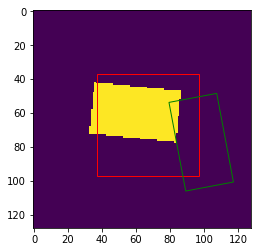

In [19]:

def draw_pred_boxes(prediction_boxes,default_boxes, img): 
    """Draw predicted boxes on the original image """
    img = img
    plt.figure()
    ax = plt.axes()
    pbox =prediction_boxes


    for box in default_boxes:
        box = center_to_coords(box.data)
        ax.imshow(img[0,0,:,:])
        p = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, color = 'red')
        ax.add_patch(p)
    
    for box in pbox:
        box2= cuda.to_cpu(box.data)
        cbox = center_to_coords(box2)
        
#         ax.imshow(img[0,0,:,:])
#         print(box)
        q = patches.Rectangle((cbox[0], cbox[1]), cbox[2]-cbox[0], cbox[3]-cbox[1], fill=False, color = 'green')
        t = transforms.Affine2D().rotate_around(box2[0], box2[1], box2[4])+ ax.transData
        q.set_transform(t)
        
        ax.add_patch(q)


    plt.show()

    
draw_pred_boxes(pred_boxes,def_boxes, rot_img)


In [20]:
pred_boxes

variable([[ 98.40045166,  77.11755371,  28.59931755,  53.09408951,
            -0.18650377,  -0.24500754,  -0.5652349 ]])

In [21]:
gt

variable([[ 50.,  50.,  20.,  50.,   0.,   1.,   0.]])

### Normalize shifts     

In [22]:

def normalize_shift(box, def_box):
    """
    Scales down absolute shifts, % for centers, log for height and width.
    
    Args:
        box: 6x1 bounding box coordinates
        def_box: 6x1 reference box coordinates
        
    Returns:
        normalized_shift_vector: 4x1 normalized shift vector. Note that we discard the last 2 channels.
    """
    tx = (box[0] - def_box[0])/def_box[2]
    ty = (box[1] - def_box[1])/def_box[3]
    tw = log(box[2]/def_box[2])
    th = log(box[3]/def_box[3])
    ang  = box[4]- def_box[4]
    return hstack([tx, ty, tw, th, ang])
    

### Regression loss 

This too seems to work 

In [23]:
def regression_loss(pred_box, gt_box, def_box):
    """
    Calculates regression loss between two boxes w.r.t a reference default box.
    
    Args:
        pred_box: 6x1 bounding box predicted by the network
        gt_box: 6x1 bounding box overlapping with pred_box
        def_box: 6x1 bounding box with same index as pred_box
        
    Returns:
        reg_loss: Scalar of huber loss between two vectors
    """
    
    gt_normalized  = normalize_shift(gt_box[0],def_box[0])
    pred_normalized = normalize_shift(pred_box[0],def_box[0])
  
    gt_normalized = gt_normalized
    pred_normalized = pred_normalized
    gt_normalized = gt_normalized.reshape((1,5))
    pred_normalized = pred_normalized.reshape((1,5))
    
    # l1 loss 
#     loss_val= pred_normalized - gt_normalized 
#     x_reg = F.absolute(loss_val )
#     x_reg =F.sum(x_reg)
    
    #huber loss 
    return F.huber_loss(gt_normalized,pred_normalized, delta =0.2)
    
reg_loss_value = regression_loss(pred_boxes, gt, def_boxes)
print(' regression loss value :', reg_loss_value)




 regression loss value : variable([ 0.28245121])


In [24]:
def compute_loss(gt_boxes, pred_boxes, def_boxes):
    
    loss_class = chainer.Variable(np.array([0.], dtype=np.float32))
    loss_reg = chainer.Variable(np.array([0.], dtype=np.float32))
    
    gt_box, pred_box, def_box = gt_boxes, pred_boxes, def_boxes    
#     loss_reg += regression_loss(pred_box, gt_box, def_box)
    loss_reg = regression_loss(pred_box, gt_box, def_box)
    
    return loss_reg 


### Get aspect ratio 

In [25]:
def get_aspect_ratios(def_size ):

    def_area = def_size*def_size
    aspect_ratios = [3, 2,0.50, 0.25]
    height_list =[]
    width_list = []

    for i in aspect_ratios: 

        height_list.append(int(def_size*i))  
        width_list.append(int(def_area/(def_size*i)) )

    return height_list,width_list

def_size= 120 
height_list, width_list= get_aspect_ratios(def_size)


print('height list :',height_list)
print('------------------------------')
print('width list :', width_list)

height list : [360, 240, 60, 30]
------------------------------
width list : [40, 60, 240, 480]


### Eveyrthing connected

Now we connect it all and first test x regression, they y regression and then combination of both

could it be that the aspect ratio of a box vs the aspect ratio of the default box have something to do with the loss? 


In [26]:
from chainer.optimizers import SGD,Adam,MomentumSGD
from tqdm import tqdm
import matplotlib.pyplot as plt

select_index =64 
def get_shifts(shift_input):
    """Get shifts"""
    
    shifts = shift_input
    shifts= shifts[:,:,select_index,select_index]
    shifts =F.reshape(shifts,[1,7,1,1])
    
    return shifts 

def get_gt_coords(posdiff, posr, posc):
    """Generate coordinates for the gt box"""
    
    width_gt =  50 #np.random.randint(40, 55) 
    height_gt = width_gt
    posx = posr+posdiff
    posy = posc+posdiff
    posr = np.random.randint(posr, posx) 
    posc = np.random.randint(posc, posy) 
    angle = np.deg2rad(np.random.randint(0, 20)) 
    
    return posr,posc, width_gt, height_gt, angle 


def predict_box(boxnet, posr, posc,width_gt, height_gt,angle, def_size, def_boxes): 
    """Get prediction boxes"""
    
    
    """generate image"""
    gt, img =rotated_generated_image(posr, posc, width_gt, height_gt,angle )
    img_gpu =  chainer.Variable(cuda.to_gpu(img))
    
    """Get shifts"""
    shifts  = get_shifts(boxnet(img_gpu))
    
    """Get default_boxes and predictions"""
    # Forward pass ends here
    
    pred_boxes = get_pred_boxes(shifts, def_boxes)

    """compute loss"""
    loss = compute_loss( gt ,pred_boxes, def_boxes)
    
    return gt,img, loss, pred_boxes



def all_connected(boxnet,posr, posc, width_gt, height_gt, alpha, number_loops, pos_diff, def_boxes):
    """
    Input
    posr         : average x location of a gt box 
    posc         : average y location of a gt box
    width_gt     : width of the ground truth box 
    height_gt    : height of the ground truth box 
    alpha        : alpha value for the adam optimizer 
    number_loops : number of examples generate


    Ouput 
    Image of the loss function 
    Loss history 
    prediction boxes
    default boxes
    ground truths 
    model 
    """

    
#     boxnet = BoxNet(ConvNet())

    optimizer =Adam(alpha= alpha)
    optimizer.setup(boxnet)
    
    def_size =120   
    loss_history = []
    size_list =[]
    
    
    for i in tqdm(range(number_loops)):
        
        """Get image coordinates"""
        pos_r, pos_c, width_gt, height_gt, angle =get_gt_coords(posdiff, posr,posc)
        
        """Predict a box and calculate loss"""
        gt,img, loss , pred_boxes= predict_box(boxnet, pos_r, pos_c,width_gt,
                                            height_gt,angle, def_size ,def_boxes)
                                                      
                                            
        # plot every 100 iterations 
        if i % 100==0: 
            
            draw_pred_boxes(pred_boxes,def_boxes, img)
            print('pred box:  ', pred_boxes)
            print('gt: ', gt)      
            #           
            plt.show()
        
        loss_history.append(loss.data)
        size_list.append(width_gt)
        
        boxnet.zerograds()
        loss.backward()
        optimizer.update()
    
    return loss_history, pred_boxes,def_boxes,  gt,img, boxnet


In [27]:
def testing_model(model, test_imgs,test_gts): 

    test_pred_boxes_all = []

    for i in range(len(test_imgs)): 
        test_shifts=boxnet(test_imgs[i])
        test_shifts = test_shifts[:,:,64,64]

        test_shifts =F.reshape(test_shifts,[1,6,1,1])
        test_def_boxes = defaultgen(test_imgs[i], fm,height_list[0] ,width_list[0])
        test_pred_boxes = get_pred_boxes(test_shifts, test_def_boxes)
        test_pred_boxes_all.append(test_pred_boxes)

    return test_pred_boxes_all 

In [28]:
height_list, width_list

([360, 240, 60, 30], [40, 60, 240, 480])


## Experiments 

  0%|          | 0/500 [00:00<?, ?it/s]

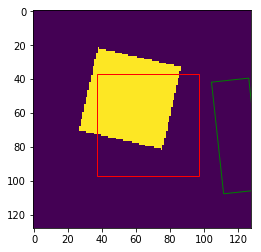

pred box:   variable([[  1.18984161e+02   7.34366913e+01   2.20372429e+01
             6.60996246e+01  -1.07956581e-01  -1.84029087e-01
            -1.14701164e+00]])
gt:  variable([[ 57.         52.         50.         50.          0.2268928   1.
             0.       ]])


 20%|██        | 100/500 [00:52<03:31,  1.89it/s]

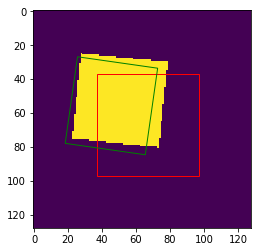

 20%|██        | 101/500 [00:53<03:52,  1.71it/s]

pred box:   variable([[ 45.54424286  55.66717911  47.63480377  51.47174072   0.14152291
            -0.26181382  -1.19443595]])
gt:  variable([[ 51.          53.          50.          50.           0.08726646
             1.           0.        ]])


 40%|████      | 200/500 [01:45<02:38,  1.89it/s]

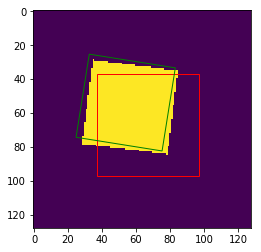

 40%|████      | 201/500 [01:46<02:52,  1.73it/s]

pred box:   variable([[ 53.94083405  53.77931213  51.28065109  49.53765488   0.15789168
            -0.19170548  -1.14404118]])
gt:  variable([[ 57.          57.          50.          50.           0.12217305
             1.           0.        ]])


 60%|██████    | 300/500 [02:38<01:45,  1.89it/s]

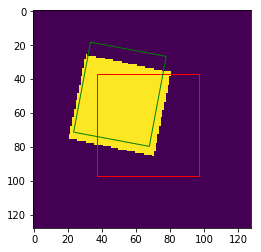

 60%|██████    | 301/500 [02:39<01:55,  1.73it/s]

pred box:   variable([[ 50.56046295  48.89614105  45.32427597  53.90320969   0.18580666
            -0.17670803  -1.21037698]])
gt:  variable([[ 51.          56.          50.          50.           0.19198622
             1.           0.        ]])


 80%|████████  | 400/500 [03:33<00:52,  1.89it/s]

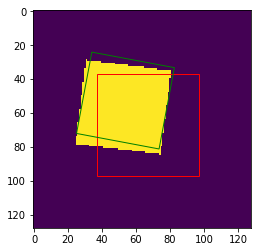

 80%|████████  | 401/500 [03:33<00:56,  1.74it/s]

pred box:   variable([[ 53.80130005  52.5879097   49.44025803  48.71390533   0.18591005
            -0.22445017  -1.15766728]])
gt:  variable([[ 53.          57.          50.          50.           0.12217305
             1.           0.        ]])


100%|██████████| 500/500 [04:26<00:00,  1.89it/s]


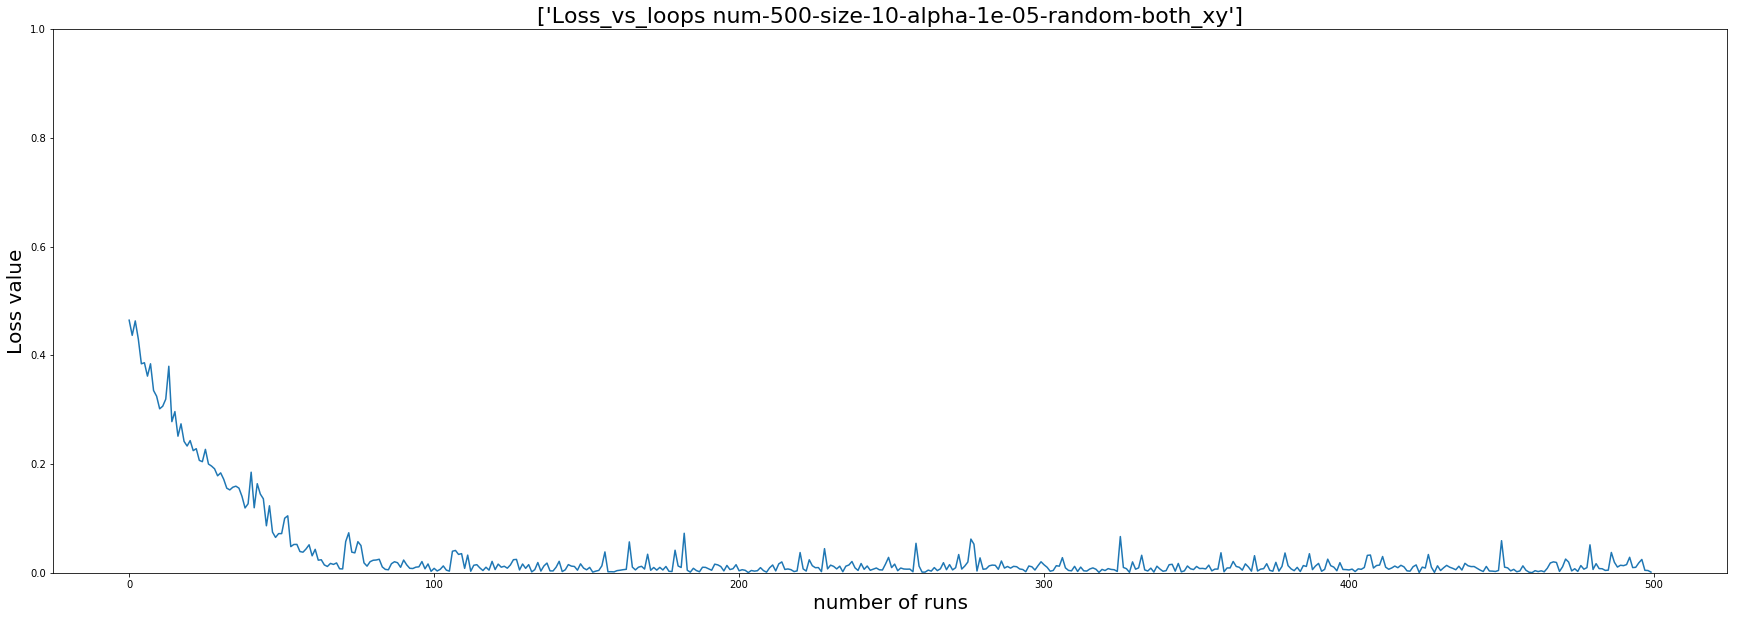

  0%|          | 0/500 [00:00<?, ?it/s]

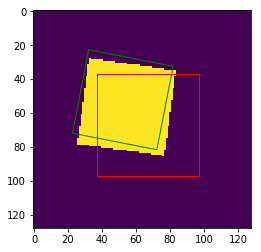

  0%|          | 1/500 [00:00<01:56,  4.27it/s]

pred box:   variable([[ 52.21908951  52.11520004  50.6405983   50.0502243    0.19295378
            -0.19165389  -1.14317679]])
gt:  variable([[ 55.          57.          50.          50.           0.13962634
             1.           0.        ]])


 20%|██        | 100/500 [00:52<03:31,  1.89it/s]

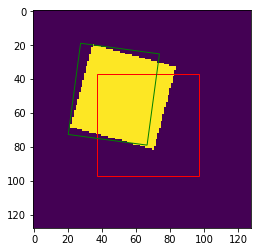

 20%|██        | 101/500 [00:53<03:53,  1.71it/s]

pred box:   variable([[ 46.96948624  48.84967041  46.82893372  54.2012558    0.1344444
            -0.18046084  -1.20508564]])
gt:  variable([[ 53.          51.          50.          50.           0.27925268
             1.           0.        ]])


 40%|████      | 200/500 [01:45<02:38,  1.89it/s]

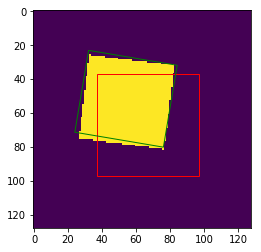

 40%|████      | 201/500 [01:46<02:54,  1.71it/s]

pred box:   variable([[ 54.13119507  51.53239441  52.88375854  48.87617111   0.16704117
            -0.19448745  -1.14432883]])
gt:  variable([[ 55.          54.          50.          50.           0.12217305
             1.           0.        ]])


 60%|██████    | 300/500 [02:38<01:45,  1.89it/s]

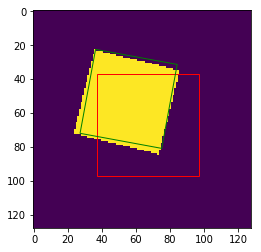

 60%|██████    | 301/500 [02:39<01:54,  1.75it/s]

pred box:   variable([[ 55.67553711  51.61271286  48.8672142   50.2400322    0.18255217
            -0.1984252   -1.12662327]])
gt:  variable([[ 55.         54.         50.         50.          0.2443461   1.
             0.       ]])


 80%|████████  | 400/500 [03:31<00:52,  1.89it/s]

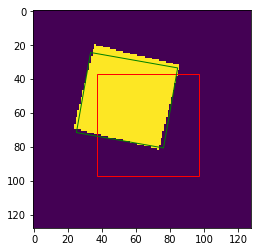

 80%|████████  | 401/500 [03:32<00:57,  1.71it/s]

pred box:   variable([[ 54.73745346  52.40005875  52.04309845  47.8555336    0.17533398
            -0.21349746  -1.15383816]])
gt:  variable([[ 55.         51.         50.         50.          0.2443461   1.
             0.       ]])


100%|██████████| 500/500 [04:24<00:00,  1.89it/s]


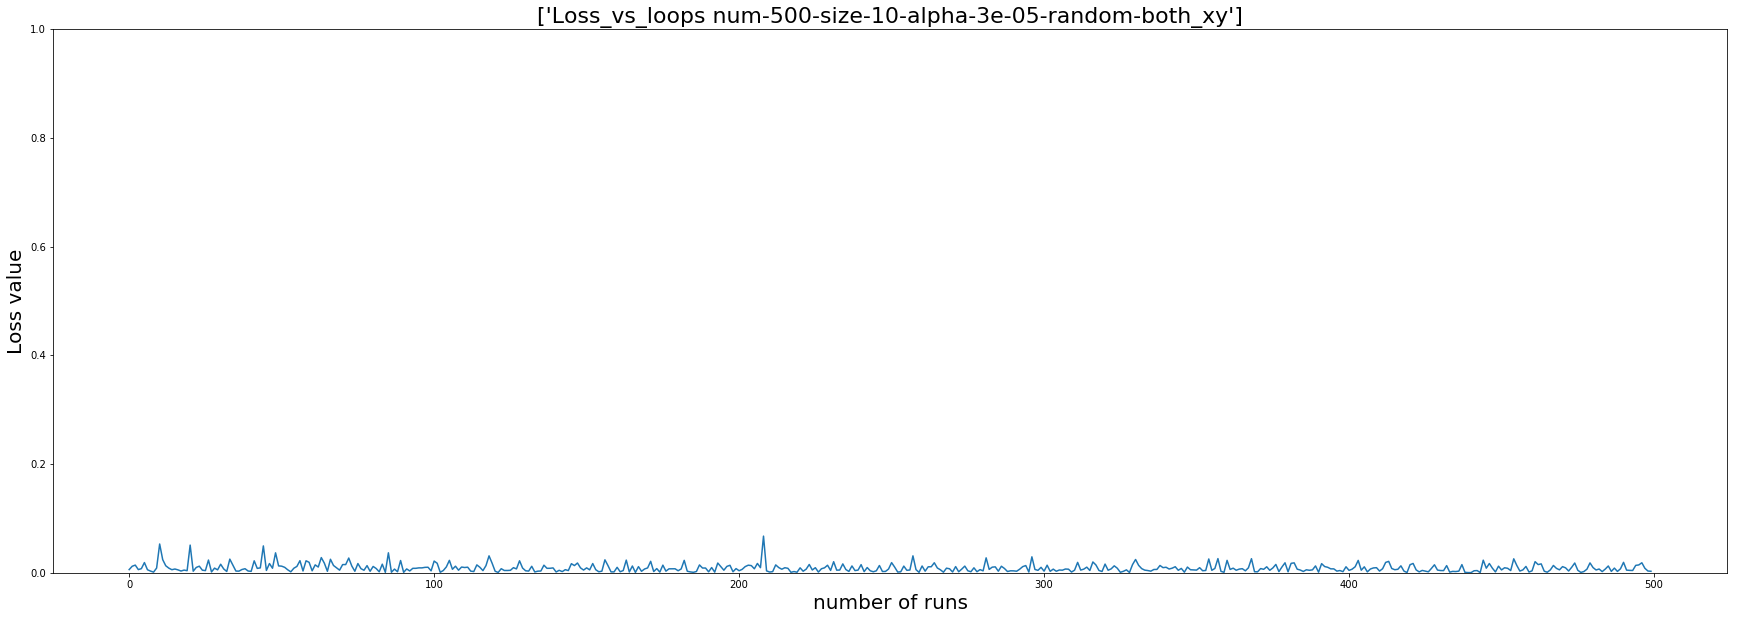

  0%|          | 0/500 [00:00<?, ?it/s]

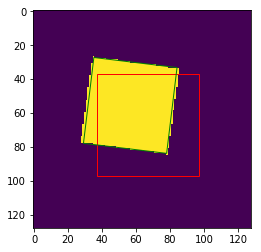

  0%|          | 1/500 [00:00<01:55,  4.34it/s]

pred box:   variable([[ 56.62944412  55.46875     49.31020737  50.87287521   0.12064275
            -0.19170548  -1.14404118]])
gt:  variable([[ 57.          56.          50.          50.           0.13962634
             1.           0.        ]])


 20%|██        | 100/500 [00:52<03:31,  1.89it/s]

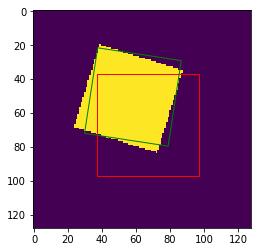

 20%|██        | 101/500 [00:53<03:50,  1.73it/s]

pred box:   variable([[ 58.18217087  50.48887634  49.78556442  50.92066574   0.15209776
            -0.21800044  -1.13961267]])
gt:  variable([[ 56.          52.          50.          50.           0.31415927
             1.           0.        ]])


 40%|████      | 200/500 [01:45<02:38,  1.89it/s]

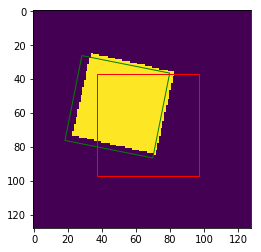

 40%|████      | 201/500 [01:46<02:54,  1.72it/s]

pred box:   variable([[ 49.02438354  56.25441742  52.71836472  50.94010544   0.19677258
            -0.2402696   -1.19007897]])
gt:  variable([[ 53.         55.         50.         50.          0.2268928   1.
             0.       ]])


 60%|██████    | 300/500 [02:38<01:45,  1.89it/s]

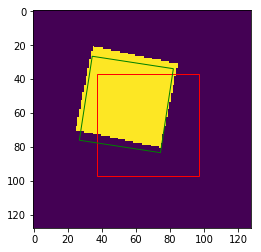

 60%|██████    | 301/500 [02:39<01:55,  1.73it/s]

pred box:   variable([[ 54.33572388  54.89356232  48.31183624  50.00989532   0.15228574
            -0.22160265  -1.14838564]])
gt:  variable([[ 55.          51.          50.          50.           0.19198622
             1.           0.        ]])


 80%|████████  | 400/500 [03:31<00:52,  1.89it/s]

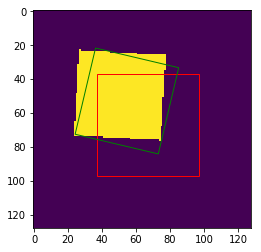

 80%|████████  | 401/500 [03:32<00:57,  1.72it/s]

pred box:   variable([[ 54.66348267  52.83931351  50.29874802  52.15712357   0.23240317
            -0.26426062  -1.18014932]])
gt:  variable([[ 51.          50.          50.          50.           0.05235988
             1.           0.        ]])


100%|██████████| 500/500 [04:24<00:00,  1.89it/s]


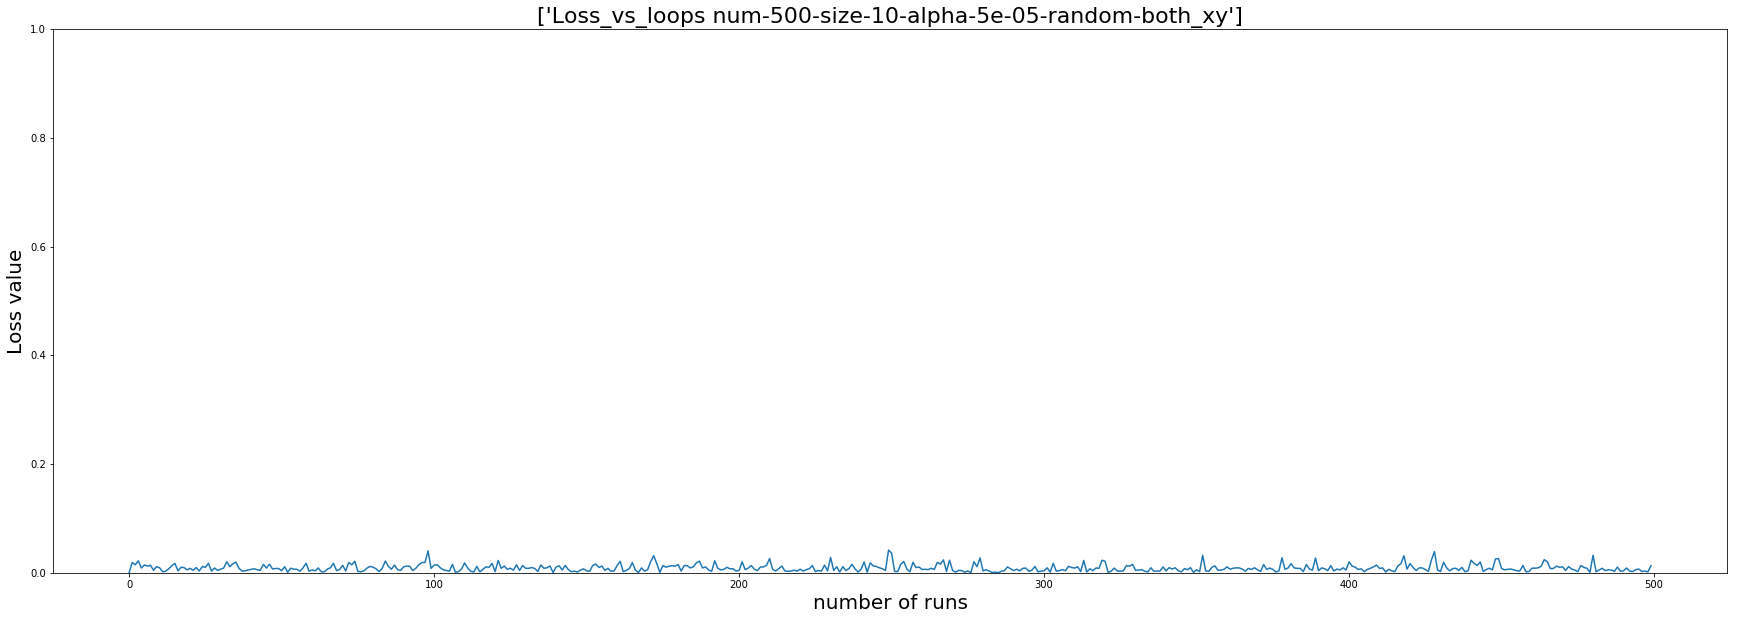

  0%|          | 0/500 [00:00<?, ?it/s]

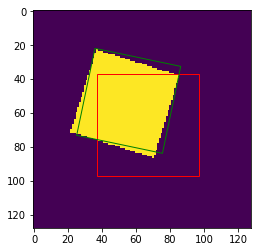

  0%|          | 1/500 [00:00<01:57,  4.25it/s]

pred box:   variable([[ 55.71633148  52.75951385  51.58511353  52.28791428   0.20713235
            -0.20658104  -1.15999055]])
gt:  variable([[ 54.          55.          50.          50.           0.29670596
             1.           0.        ]])


 20%|██        | 100/500 [00:52<03:31,  1.89it/s]

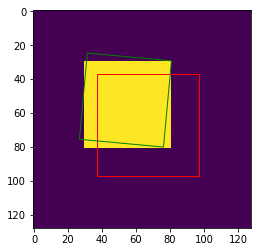

 20%|██        | 101/500 [00:53<03:48,  1.74it/s]

pred box:   variable([[ 53.77950287  52.29947281  49.72967911  50.97846222   0.0922333
            -0.19170548  -1.14404118]])
gt:  variable([[ 55.  55.  50.  50.   0.   1.   0.]])


 40%|████      | 200/500 [01:45<02:38,  1.89it/s]

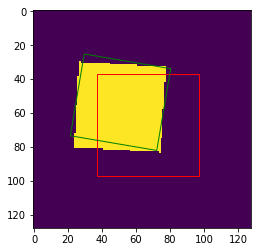

 40%|████      | 201/500 [01:46<02:51,  1.75it/s]

pred box:   variable([[ 50.88785172  53.57003784  51.59790802  48.82090378   0.16844542
            -0.23123462  -1.16320491]])
gt:  variable([[  5.10000000e+01   5.70000000e+01   5.00000000e+01
             5.00000000e+01   5.23598790e-02   1.00000000e+00
             0.00000000e+00]])


 60%|██████    | 300/500 [02:38<01:45,  1.89it/s]

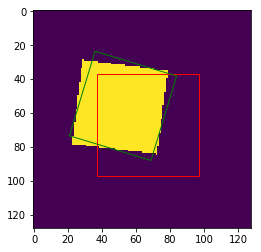

 60%|██████    | 301/500 [02:39<01:53,  1.75it/s]

pred box:   variable([[ 52.36643219  55.73593903  50.14570236  51.95269394   0.29382598
            -0.23998426  -1.2169627 ]])
gt:  variable([[ 51.          57.          50.          50.           0.12217305
             1.           0.        ]])


 80%|████████  | 400/500 [03:31<00:52,  1.89it/s]

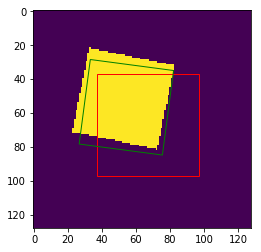

 80%|████████  | 401/500 [03:31<00:56,  1.75it/s]

pred box:   variable([[ 54.33744431  56.55349731  49.41738892  50.18758011   0.13134408
            -0.22755396  -1.18843377]])
gt:  variable([[ 53.          52.          50.          50.           0.20943952
             1.           0.        ]])


100%|██████████| 500/500 [04:24<00:00,  1.89it/s]


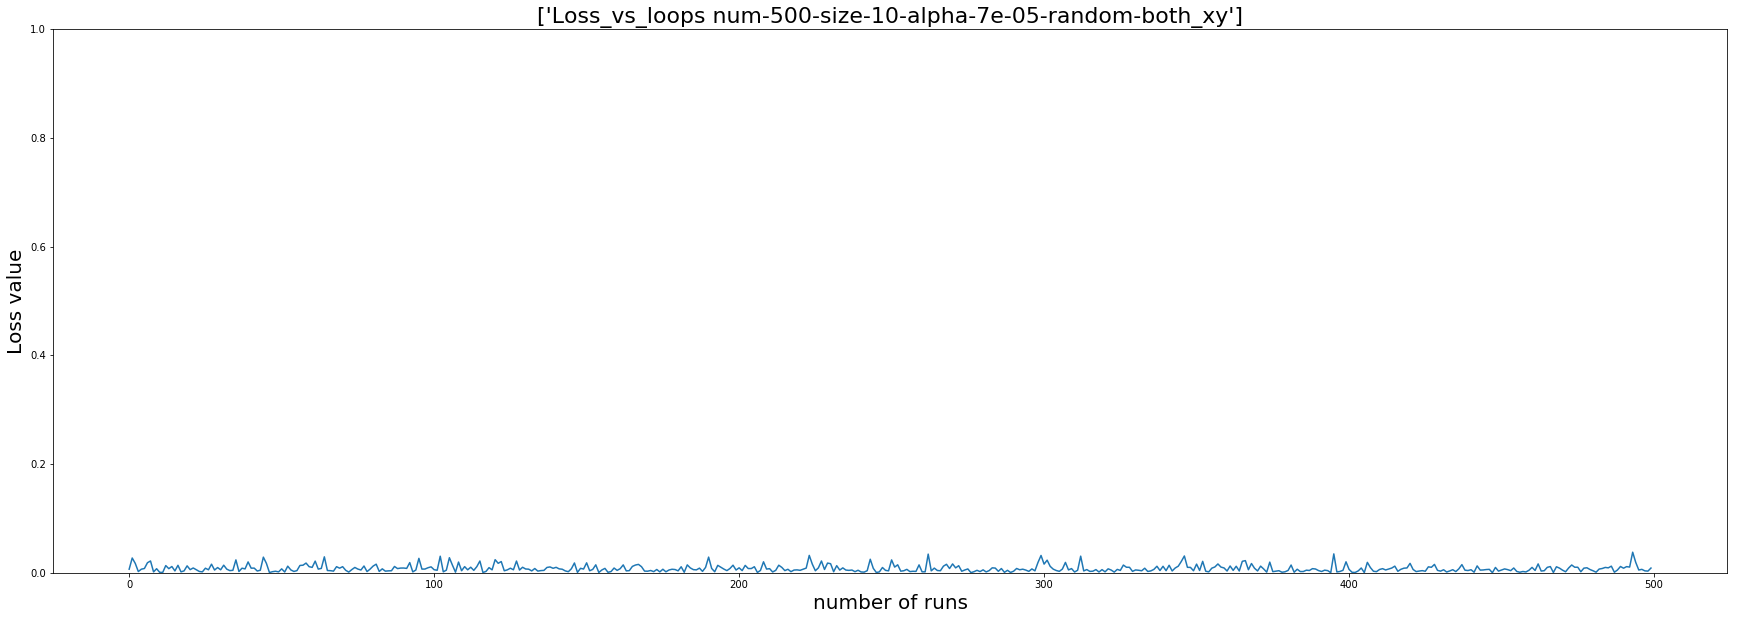

  0%|          | 0/500 [00:00<?, ?it/s]

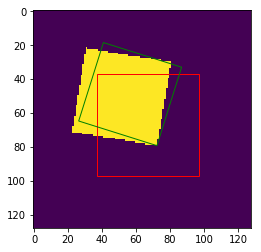

  0%|          | 1/500 [00:00<01:55,  4.32it/s]

pred box:   variable([[ 56.57466888  48.7979393   48.26936722  48.40731049   0.30513734
            -0.22392622  -1.21595454]])
gt:  variable([[ 52.          51.          50.          50.           0.15707964
             1.           0.        ]])


 20%|██        | 100/500 [00:52<03:31,  1.89it/s]

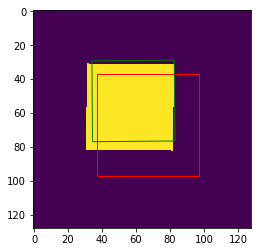

 20%|██        | 101/500 [00:53<03:50,  1.73it/s]

pred box:   variable([[  5.84973717e+01   5.28208961e+01   4.84848709e+01
             4.75780258e+01  -8.41445010e-03  -1.91705480e-01
            -1.14404118e+00]])
gt:  variable([[  5.70000000e+01   5.70000000e+01   5.00000000e+01
             5.00000000e+01   1.74532924e-02   1.00000000e+00
             0.00000000e+00]])


 40%|████      | 200/500 [01:45<02:38,  1.89it/s]

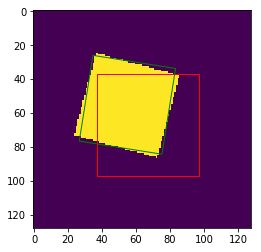

 40%|████      | 201/500 [01:46<02:51,  1.74it/s]

pred box:   variable([[ 54.96772385  55.08325958  49.26979828  51.0990181    0.15749535
            -0.19989234  -1.12757444]])
gt:  variable([[ 55.          56.          50.          50.           0.27925268
             1.           0.        ]])


 60%|██████    | 300/500 [02:38<01:45,  1.89it/s]

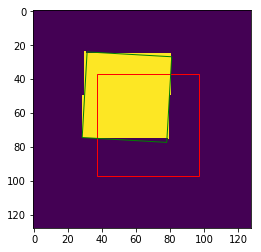

 60%|██████    | 301/500 [02:39<01:54,  1.75it/s]

pred box:   variable([[ 54.67639923  50.58914185  49.86045456  50.48587418   0.05736311
            -0.16915235  -1.19051003]])
gt:  variable([[  5.50000000e+01   5.00000000e+01   5.00000000e+01
             5.00000000e+01   3.49065848e-02   1.00000000e+00
             0.00000000e+00]])


 80%|████████  | 400/500 [03:31<00:52,  1.89it/s]

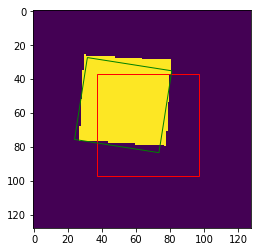

 80%|████████  | 401/500 [03:31<00:57,  1.71it/s]

pred box:   variable([[ 52.45511627  55.28095627  50.29585266  48.78403854   0.15545648
            -0.18969716  -1.14397991]])
gt:  variable([[ 54.          53.          50.          50.           0.06981317
             1.           0.        ]])


100%|██████████| 500/500 [04:24<00:00,  1.89it/s]


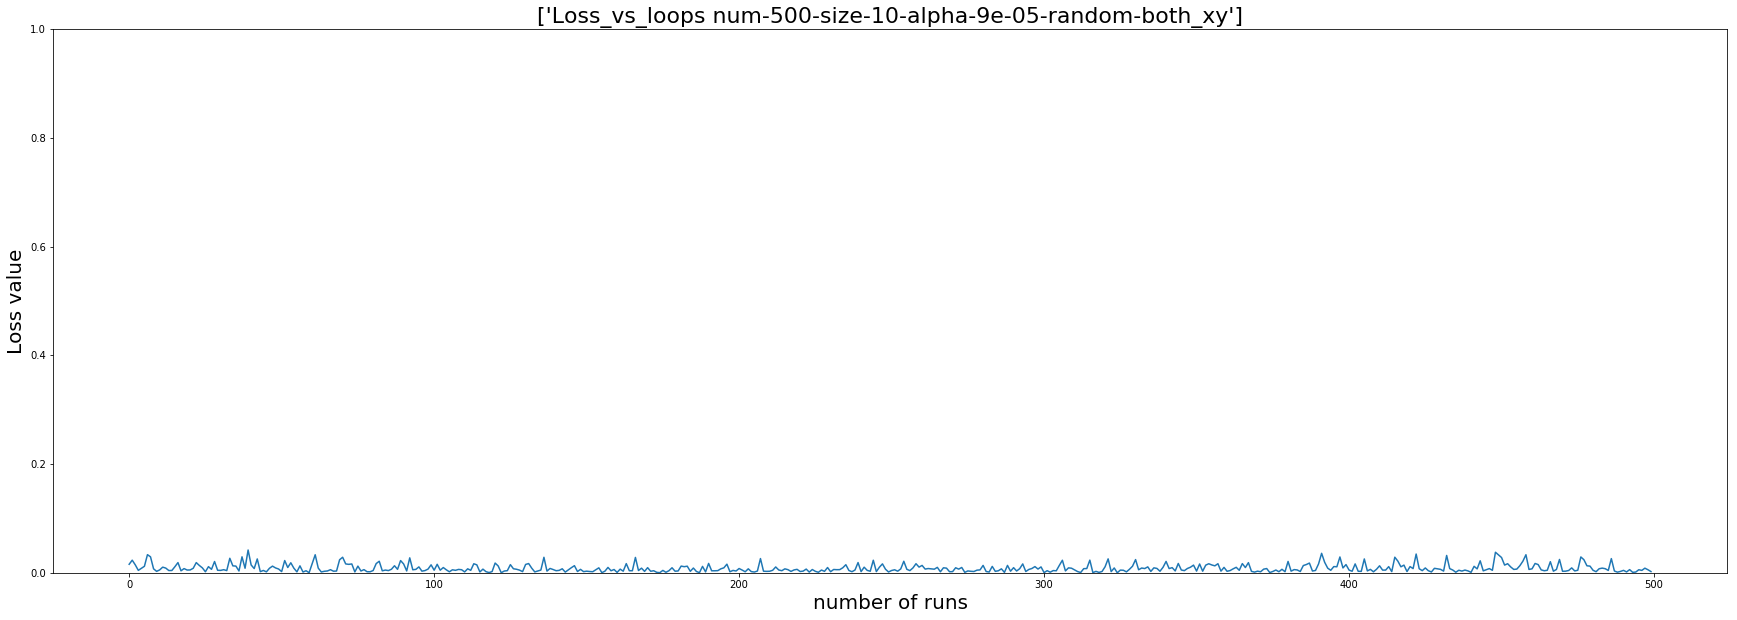

(0,)

In [29]:
"""Main code """
import chainer.cuda as cuda 
all_losses = []
alpha = 0.000008
size= 10
nloops= 500
posdiff = 8
alpha2 = [0.00001,0.00003,0.00005,0.00007,0.00009  ]
for i in range(0,5):    
    # generate random x and y locations
    avg_locx= 50
    avg_locy= 50
    alpha = alpha2[i]
    # generate default box 
    def_boxes = defaultgen(img,fm, 60,60,0.0)
    def_box_index =np.ravel_multi_index((select_index,select_index),(shifts_all.shape[2],shifts_all.shape[3]))
    def_boxes = def_boxes[def_box_index,:]
    def_boxes =def_boxes.reshape([1,1,7])
    def_boxes = def_boxes[0]



    # training network 
    loss_history, pred_boxes, def_boxes, ground_truth, image,boxnet = all_connected(boxnet,avg_locx,
                                                                                    avg_locy,
                                                                                    size,size,
                                                                                    alpha, nloops,
                                                                                    posdiff,def_boxes)


    # plot loss 
    random_or_not = 'both_xy'
    plt.figure(figsize=(30,10))
    plt.xlabel('number of runs', size =20)
    plt.ylabel('Loss value', size =20)

    title_name =['Loss_vs_loops num-'+  
                 str(nloops)+'-size-'+ str(size) + 
                 '-alpha-'+str(alpha)+'-random-'+ 
                 random_or_not]

    plt.title(title_name, size=22 )
    plt.ylim([0,1])
    plt.plot(range(len(loss_history)), loss_history)
    plt.show()

    # end for 
    
all_losses = np.array(all_losses)
all_losses2 = all_losses.transpose()
all_losses2.shape  



In [30]:
ground_truth

variable([[ 57.        ,  56.        ,  50.        ,  50.        ,
             0.12217305,   1.        ,   0.        ]])

In [31]:
pred_boxes

variable([[ 55.43351364,  57.66256714,  51.03838348,  47.55910492,
             0.13235611,  -0.1917236 ,  -1.14402103]])

In [32]:
def_boxes

variable([[ 67.17212677,  67.17212677,  60.        ,  60.        ,
             0.        ,   0.        ,   0.        ]])

In [33]:
image = np.zeros((1,3,128,128), dtype=np.float32)
l1=L.Convolution2D(None,32,ksize=(3,3),stride=1,pad=1)

In [34]:
class ConvNet(chainer.C:
    def __init__(self)

SyntaxError: invalid syntax (<ipython-input-34-f8641e6e5a39>, line 1)

In [ ]:
gpu_image = chainer.Variable(cuda.to_gpu(image))

In [ ]:
gpu_image

In [ ]:
l1(gpu_image)

In [ ]:
class ConvNet(Chain):
    def __init__(self):
        super(ConvNet, self).__init__(
            l1=L.Convolution2D(None,32,ksize=(3,3),stride=1,pad=1)
        )
        
    def __call__(self, x):
        return F.relu(self.l1(x)) 


In [ ]:
conv = ConvNet()

In [ ]:
conv.to_gpu(0)

In [ ]:
conv(img)